#Portada

**Profesor:** Daniel Jiménez Alcantar

**Alumnos:**

* Artero Andrade Jesús
* García Pérez Maximiliano
* González Luna Diego Amaury
* Rosas Sánchez Edgar Eduardo


#Instrucciones


1.- Elija tres Dataset de su elección, deberá acondicionarse de tal manera que pueda realizar el análisis de una serie de tiempo. Desarrolle un reporte técnico que permita observar el trabajo en los siguientes puntos:

* Construir gráfico de la serie de tiempo con los datos del dataset. Explicar el comportamiento.
* Aplicar la prueba Dickey-Fuller  a las 3 series de tiempo. Explicar en qué consiste la prueba y los resultados.



#Introcuccion

Al graficar una serie de tiempo, podemos obtener una visión visual de sus características clave, como la tendencia, que nos muestra si la serie sigue un patrón ascendente o descendente a lo largo del tiempo. También nos permite identificar posibles estacionalidades, patrones recurrentes que se repiten en intervalos regulares, así como volatilidad, que se refiere a la magnitud de las fluctuaciones en los valores de la serie. Además, la visualización puede revelar ciclicidad, donde los datos siguen ciclos no necesariamente fijos, y detectar anomalías o puntos atípicos que podrían indicar eventos inusuales en los datos.

Por otro lado, al realizar la prueba Dickey-Fuller (ADF), se evalúa la estacionariedad de la serie de tiempo. Esta prueba verifica si la serie tiene una raíz unitaria, lo que indicaría que no es estacionaria y contiene una tendencia a largo plazo. Si la hipótesis nula de la prueba es rechazada (con un valor p menor a 0.05), la serie es estacionaria, lo que significa que sus propiedades estadísticas, como la media y la varianza, son constantes a lo largo del tiempo. En cambio, si no se rechaza la hipótesis nula, la serie se considera no estacionaria, lo que sugiere que puede ser necesario aplicar transformaciones, como la diferenciación, para hacerla estacionaria antes de realizar modelos predictivos.

#Desarrollo

Se elligieron 3 datasets extraidos en Kaggle:
* Ingresos de una tienda
* Demanda de electricidad
* Valor de bitcoin en USD



###Importación librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

###Definición de función prueba Dickey-Fuller

In [2]:
# Función para aplicar la prueba de Dickey-Fuller
def dickey_fuller_test(series, title):
    adf_test = adfuller(series)
    adf_statistic = adf_test[0]
    p_value = adf_test[1]

    adf_statistic, p_value
    print(f'Prueba de Dickey-Fuller para {title}:')
    print(f'Estadístico de prueba: {adf_statistic}')
    print(f'P-valor: {p_value}')
    if p_value < 0.05:
        print(f"La serie es estacionaria, ya que {p_value} < 0.05 (rechazamos H0).")
    else:
        print(f"La serie NO es estacionaria, ya que {p_value} > 0.05 (no se rechaza H0).")

##Definición de función para graficar las series de tiempo

In [3]:
# Gráficos de series de tiempo
def graficar_serie(df, x, y, titulo):
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x=x, y=y)
    plt.title(titulo)
    plt.xlabel("Fecha")
    plt.ylabel(y)
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

##Ingresos de tienda

###Carga de datos y preprocesamiento



In [4]:
# Procesamiento de IngresosTienda.csv
ingresos = pd.read_csv("/content/IngresosTienda.csv")
ingresos["Fecha"] = pd.to_datetime(ingresos["Fecha"])

###Serie de tiempo graficada

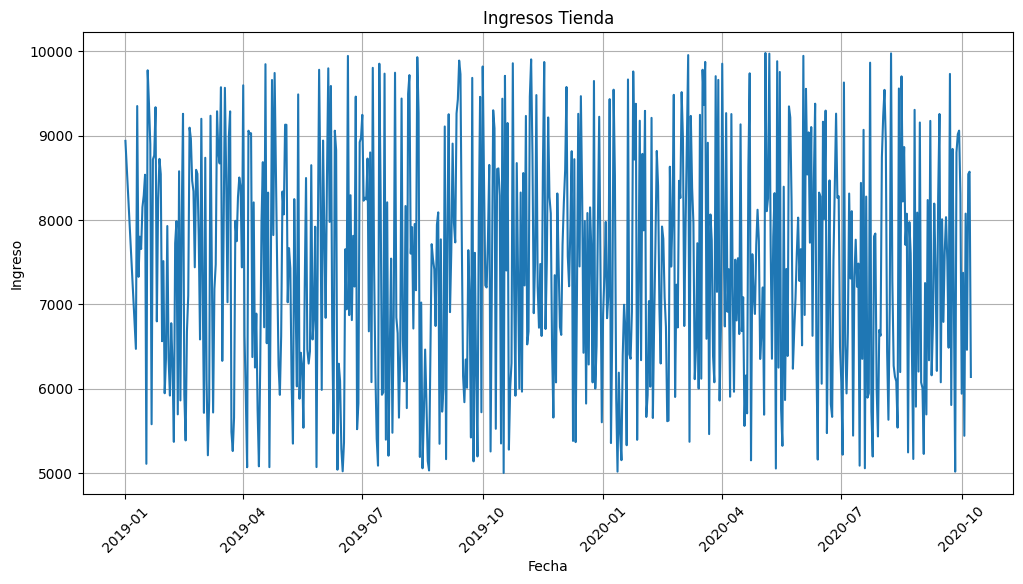

In [5]:
graficar_serie(ingresos, "Fecha", ingresos.columns[2], "Ingresos Tienda")

Tiene un comportamiento que asemeja a un ruido, por lo que parede estacionaria, ya que a simple vista no presenta algun patron o tendencia

###Prueba de Dickey-Fuller

In [6]:
dickey_fuller_test(ingresos['Ingreso'], 'Ingresos de la Tienda')

Prueba de Dickey-Fuller para Ingresos de la Tienda:
Estadístico de prueba: -25.948564647600694
P-valor: 0.0
La serie es estacionaria, ya que 0.0 < 0.05 (rechazamos H0).


La prueba de Dickey-Fuller muestra un estadístico de -25.95 y un p-valor de 0.0, lo que indica que la serie de ingresos de la tienda es estacionaria, ya que el p-valor es menor que 0.05, rechazando la hipótesis nula (H0) de no estacionariedad.

##Demanda de eletricidad

###Carga de datos y preprocesamiento

In [7]:
# Procesamiento de IngresosTienda.csv
demanda = pd.read_csv("/content/demandaElectricidad.csv")
demanda["Fecha"] = pd.to_datetime(demanda["Fecha"])

###Serie de tiempo graficada

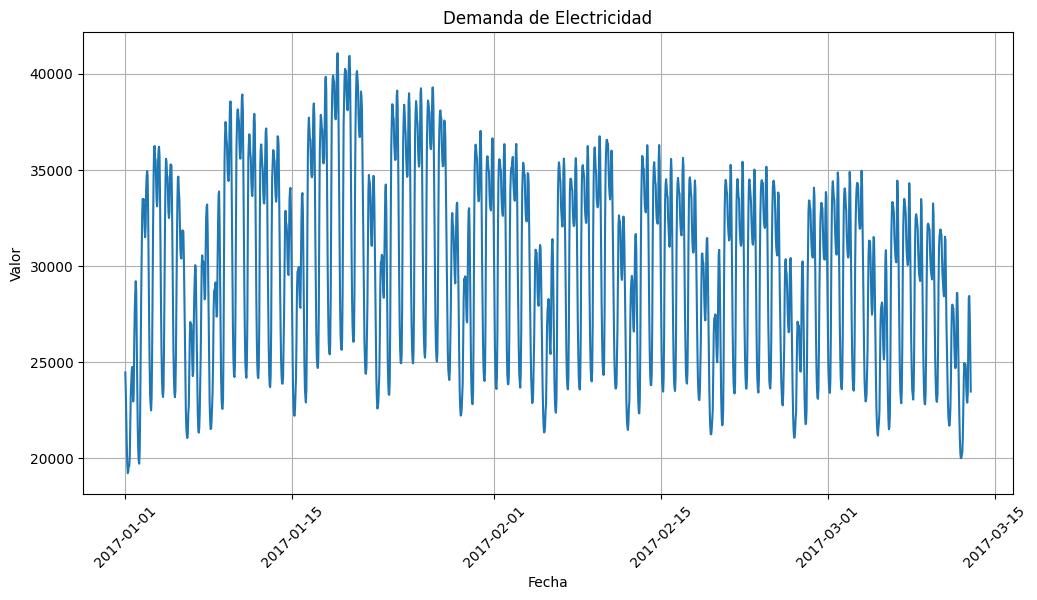

In [8]:
graficar_serie(demanda, "Fecha", demanda.columns[0], "Demanda de Electricidad")

Tiene un comportamiento que asemeja a un ruido, por lo que parede estacionaria, ya que a simple vista no presenta algun patron o tendencia

###Prueba de Dickey-Fuller

In [9]:
dickey_fuller_test(demanda['Valor'], 'Demanda de Electricidad')

Prueba de Dickey-Fuller para Demanda de Electricidad:
Estadístico de prueba: -4.359657395695945
P-valor: 0.0003496235432621267
La serie es estacionaria, ya que 0.0003496235432621267 < 0.05 (rechazamos H0).


 El estadístico de prueba es -4.36 y el p-valor es 0.00035, lo que también demuestra que la serie de demanda de electricidad es estacionaria, ya que el p-valor es significativamente menor que 0.05, lo que lleva al rechazo de la hipótesis nula (H0).

##Valor de bitcoin

###Carga de datos y preprocesamiento

In [10]:
# Procesamiento de valorBitcoin.csv
bitcoin = pd.read_csv("/content/valorBitcoin.csv")
bitcoin.rename(columns={bitcoin.columns[0]: "Fecha"}, inplace=True)
bitcoin["Fecha"] = pd.to_datetime(bitcoin["Fecha"])
bitcoin = bitcoin.drop(columns=['open_USD', 'high_USD', 'low_USD', 'volume'], errors='ignore')
bitcoin.rename(columns={"close_USD": "ValorCierreUSD"}, inplace=True)
bitcoin.to_csv("/content/valorBitcoin.csv", index=False)

###Serie de tiempo graficada

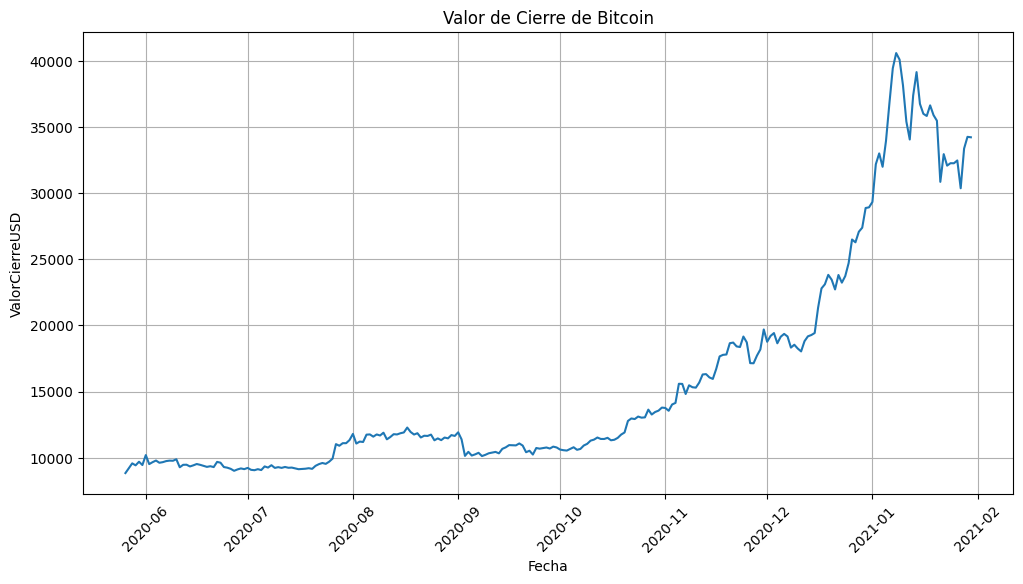

In [11]:
graficar_serie(bitcoin, "Fecha", "ValorCierreUSD", "Valor de Cierre de Bitcoin")

Esta grafica se comporta con una tendencia creciente, mostando que no es estacionaria a simple vista.

###Prueba de Dickey-Fuller

In [12]:
dickey_fuller_test(bitcoin['ValorCierreUSD'], 'Valor de bitcoin')

Prueba de Dickey-Fuller para Valor de bitcoin:
Estadístico de prueba: -2.1412014949884073
P-valor: 0.22827310165344272
La serie NO es estacionaria, ya que 0.22827310165344272 > 0.05 (no se rechaza H0).


En este caso, el estadístico es -2.14 y el p-valor es 0.2283, lo que sugiere que la serie del valor de Bitcoin no es estacionaria, ya que el p-valor es mayor que 0.05, por lo que no se rechaza la hipótesis nula (H0).